In [151]:
import numpy as np
import random
from matplotlib import pyplot as plt
import torch

seed = 1234
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)

xpts = np.linspace(0, 20, 100) + np.random.normal(0.0, 1.0, 100)
m_actual = np.random.normal(0.0, 1.0)
b_actual = np.random.normal(0.0, 5.0)
ypts = m_actual * xpts + b_actual + np.random.normal(0.0, 1.0, 100)


In [157]:
# Defining the model architecture.
class LinearRegressionModel(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1)
        # this layer of the model has a single neuron, that takes in one scalar input and gives out one scalar output. 

    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 

# Creating the model
model = LinearRegressionModel()


In [158]:
# Defining the Loss Function
# Mean Squared Error is the most common choice of Loss Function for Linear Regression models.
criterion = torch.nn.MSELoss()

# Defining the Optimizer, which would update all the trainable parameters of the model, making the model learn the data distribution better and hence fit the distribution better.
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) 


In [161]:
# We also need to convert all the data into tensors before we could use them for training our model.
data_x = torch.tensor(xpts, dtype=torch.float).reshape(-1, 1)
data_y = torch.tensor(ypts, dtype=torch.float).reshape(-1, 1)

In [160]:
losses = []         # to keep track of the epoch lossese 
slope_list = []     # to keep track of the slope learnt by the model
intercept_list = [] # to keep track of the intercept learnt by the model

EPOCHS = 3500
print('TRAINING...')
for epoch in range(EPOCHS):
    # We need to clear the gradients of the optimizer before running the back-propagation in PyTorch
    optimizer.zero_grad() 
    
    # Feeding the input data in the model and getting out the predictions
    pred_y = model(data_x)

    # Calculating the loss using the model's predictions and the real y values
    loss = criterion(pred_y, data_y) 

    # Back-Propagation
    loss.backward() 
    
    # Updating all the trainable parameters
    optimizer.step()
    
    # Appending the loss.item() (a scalar value)
    losses.append(loss.item())
    
    # Appending the learnt slope and intercept   
    slope_list.append(model.linear.weight.item())
    intercept_list.append(model.linear.bias.item())
    
    # We print out the losses after every 2000 epochs
    if (epoch) % 100 == 0:
        print('loss: ', loss.item())

TRAINING...
loss:  136.49815368652344
loss:  109.5687484741211
loss:  86.8956069946289
loss:  68.06427764892578
loss:  52.630104064941406
loss:  40.165733337402344
loss:  30.26337242126465
loss:  22.537700653076172
loss:  16.629310607910156
loss:  12.208366394042969
loss:  8.978036880493164
loss:  6.677339553833008
loss:  5.082867622375488
loss:  4.009038925170898
loss:  3.306778907775879
loss:  2.8605921268463135
loss:  2.5844178199768066
loss:  2.416719675064087
loss:  2.315347671508789
loss:  2.2527031898498535
loss:  2.2115354537963867
loss:  2.181565284729004
loss:  2.1569664478302
loss:  2.134601354598999
loss:  2.112870216369629
loss:  2.0910041332244873
loss:  2.0686569213867188
loss:  2.0456879138946533
loss:  2.0220508575439453
loss:  1.997740626335144
loss:  1.972770094871521
loss:  1.9471615552902222
loss:  1.920943021774292
loss:  1.8941459655761719
loss:  1.8668066263198853


Text(0, 0.5, 'Loss')

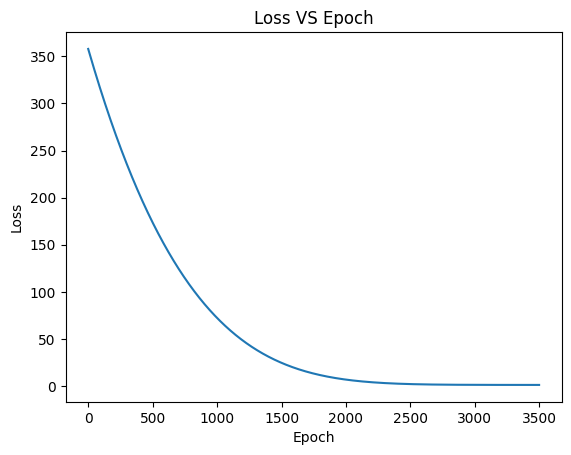

In [100]:
# Plotting the epoch losses
plt.plot(losses)
plt.title('Loss VS Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

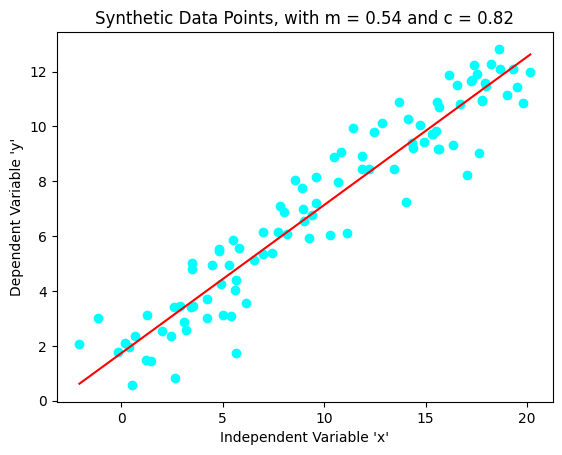

In [102]:
plt.scatter(x_list, y_list , color = 'cyan')
plt.plot((x_min, x_max), (m_learnt * x_min + b_learnt, m_learnt * x_max + b_learnt), color = 'r')
plt.title('Synthetic Data Points, with m = {} and c = {}'.format(round(m_learnt, 2), round(c_learnt, 2)))
plt.xlabel("Independent Variable 'x'")
plt.ylabel("Dependent Variable 'y'");
